<center>
<img src="../../img/ods_stickers.jpg">
## <center>Открытый курс по машинному обучению
<center> Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий



# <center>Домашнее задание 7. <br> Метод главных компонент, t-SNE и кластеризация</center>

В этой домашней работе мы  попрактикуемся в снижении размерности, визуализации и кластеризации данных, встроенных в `sklearn`. Ответы на вопросы заполните в [веб-форме](https://docs.google.com/forms/d/e/1FAIpQLSdjgje8qvptEW1EKY-QBbHXmXGIs6QYK2PqhchzF4Kpg3v8OQ/viewform?usp=sf_link).

## 1. PCA

Начнём с того, что импортируем все необходимые модули

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [135]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib
import seaborn as sns

Using matplotlib backend: Qt5Agg


Дана игрушечная выборка. 

In [2]:
X = np.array([[2., 13.], [1., 3.], [6., 19.],
              [7., 18.], [5., 17.], [4., 9.],
              [5., 22.], [6., 11.], [8., 25.]])

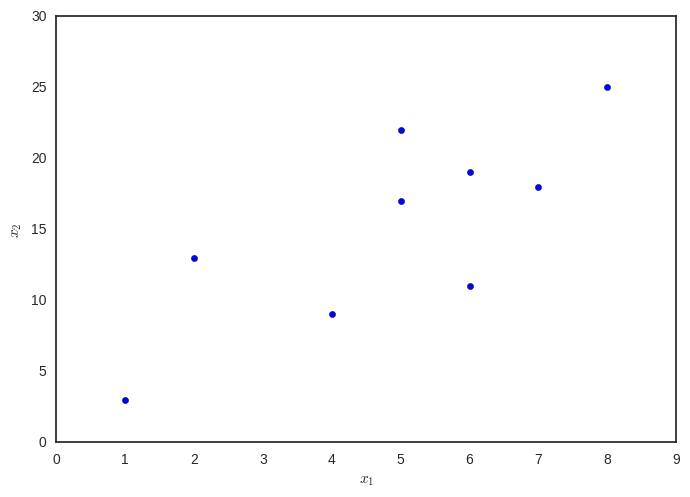

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

<font color='red'>Вопрос 1. </font>На сколько градусов относительно оси $x_1$ повернут вектор, задающий 1 главную компоненту в этих данных (на забудьте отмасштабировать выборку при помощи StandardScaler)? 
- 30 градусов
- 45 градусов
- 60 градусов
- 75 градусов

# 30

In [6]:
X = np.array([[2., 13.], [1., 3.], [6., 19.],
              [7., 18.], [5., 17.], [4., 9.],
              [5., 22.], [6., 11.], [8., 25.]])

In [7]:
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(X)
X_scaled

array([[-1.35534369, -0.3430981 ],
       [-1.82450112, -1.88703953],
       [ 0.52128604,  0.58326676],
       [ 0.99044347,  0.42887262],
       [ 0.0521286 ,  0.27447848],
       [-0.41702883, -0.96067467],
       [ 0.0521286 ,  1.04644919],
       [ 0.52128604, -0.65188638],
       [ 1.4596009 ,  1.50963162]])

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
scaler.transform(X)

array([[-1.35534369, -0.3430981 ],
       [-1.82450112, -1.88703953],
       [ 0.52128604,  0.58326676],
       [ 0.99044347,  0.42887262],
       [ 0.0521286 ,  0.27447848],
       [-0.41702883, -0.96067467],
       [ 0.0521286 ,  1.04644919],
       [ 0.52128604, -0.65188638],
       [ 1.4596009 ,  1.50963162]])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [14]:
X[:,0]

array([ 2.,  1.,  6.,  7.,  5.,  4.,  5.,  6.,  8.])

In [15]:
X[:,1]

array([ 13.,   3.,  19.,  18.,  17.,   9.,  22.,  11.,  25.])

In [21]:
X_scaled.mean(axis=0)

array([ -2.22044605e-16,   9.86864911e-17])

/home/dz/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


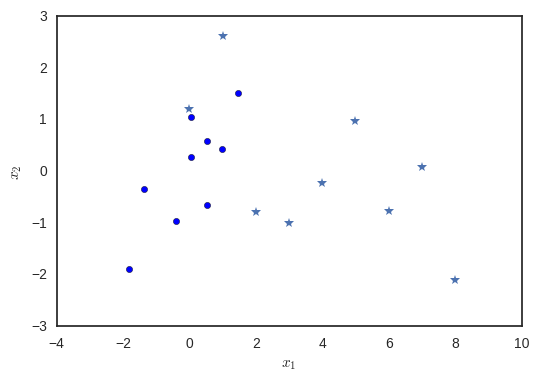

In [26]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X_scaled.copy()
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.scatter(X_scaled[:,0], X_scaled[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');
plt.plot(X_pca[:, 0], '*')
plt.legend(loc=0);

In [27]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            ['0','1'])))

1 component: 88.72% of initial variance
-0.707 x 0 + -0.707 x 1
2 component: 11.28% of initial variance
0.707 x 0 + -0.707 x 1


<font color='red'>Вопрос 2. </font> Каковы собственные значения матрицы $X^TX$, где $X$ – матрица, соответствующая отмасштабированной выборке? 

 - 4 и 1.42
 - 16.2 и 2702.8
 - 4.02 и 51.99
 - 15.97 и 2.03

# 15.97 2.03

In [31]:
z = np.dot(X_scaled.T,X_scaled)
z

array([[ 9.        ,  6.96987204],
       [ 6.96987204,  9.        ]])

In [32]:
np.linalg.eig(z)

(array([ 15.96987204,   2.03012796]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

<font color='red'>Вопрос 3. </font> В чем смысл двух чисел из прошлого вопроса? 

- их квадраты говорят о том, какую часть дисперсии исходных данных объясняют главные компоненты
- они задают угол, на который 1-я главная компонента повернута относительно исходных координат
- эти числа говорят о том, какую часть дисперсии исходных данных объясняют главные компоненты
- корни из этих чисел задают угол, на который 1-я главная компонента повернута относительно исходных координат

# эти числа говорят о том, какую часть дисперсии исходных данных объясняют главные компоненты

Загрузим датасет с лицами людей и выведем имена этих людей (это должно делаться при подключении к Интернету, причем нужно неплохое соединение, не как в метро).

In [125]:
lfw_people

{'DESCR': 'LFW faces dataset',
 'data': array([[  60.33333206,   58.33333206,   89.66666412, ...,   65.66666412,
           91.        ,  152.        ],
        [  49.33333206,   62.33333206,  101.        , ...,   96.33333588,
          102.33333588,   98.        ],
        [  30.        ,   42.        ,   65.33333588, ...,  204.        ,
          208.        ,  209.33332825],
        ..., 
        [  65.66666412,   82.33333588,  117.        , ...,  120.66666412,
           26.66666603,   57.33333206],
        [  52.        ,   61.33333206,   69.66666412, ...,   16.        ,
           15.        ,   14.66666698],
        [  65.33333588,   80.66666412,   97.33333588, ...,  144.33332825,
          150.66667175,  120.        ]], dtype=float32),
 'images': array([[[  60.33333206,   58.33333206,   89.66666412, ...,  218.        ,
           230.        ,  231.        ],
         [  55.66666794,   75.66666412,  110.        , ...,  193.        ,
           216.66667175,  218.        ],
    

In [33]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Посмотрим на содержимое датасета. Все изображения лежат в массиве lfw_people.images

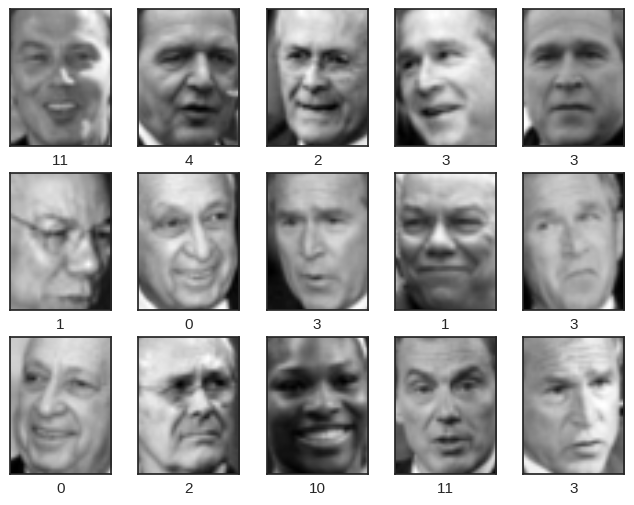

In [124]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')
    plt.xlabel(lfw_people.target[i])

<font color='red'>Вопрос 4. </font>Какое **минимальное** число компонент PCA необходимо, чтобы объяснить 90% дисперсии масштабированных (при помощи StandardScaler) данных?

- 75
- 76
- 77
- 78

Для PCA в данной задаче стоит использовать параметр [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), который является приближением PCA, но позволяет существенно ускорить его работу на больших наборах данных. Для того, чтобы результаты можно было сравнивать, нужно зафиксировать `random_state=1`.

# 76

In [40]:
lfw_people.data.shape

(1560, 1850)

In [41]:
scaler = preprocessing.StandardScaler().fit(lfw_people.data)
X_scaled = scaler.transform(lfw_people.data)

In [42]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=80,svd_solver='randomized',random_state=1)
X_centered = X_scaled.copy()
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [46]:
v = 0
for i  in range(80):
    v = v+100*pca.explained_variance_ratio_[i]
    print(i,v)

0 26.8195011316
1 41.0101343931
2 48.1652780995
3 53.3286166084
4 56.5002239964
5 59.0435455957
6 61.0474328419
7 62.7227036846
8 64.3065572213
9 65.8285754709
10 67.1105443917
11 68.3670120294
12 69.5803345605
13 70.6092939301
14 71.594825274
15 72.5219643335
16 73.4217326721
17 74.2000106189
18 74.8708250264
19 75.5217206259
20 76.1335208717
21 76.6955368185
22 77.2328270666
23 77.757263475
24 78.2473390752
25 78.7082267895
26 79.1361865524
27 79.5521137879
28 79.9593290517
29 80.3365543222
30 80.7038647961
31 81.0570468985
32 81.4007625673
33 81.7381537978
34 82.0585617636
35 82.3672120001
36 82.6677484978
37 82.9529252217
38 83.2342714151
39 83.5088333817
40 83.7704101282
41 84.0276526784
42 84.2761929335
43 84.5218035379
44 84.7615888613
45 84.9896180516
46 85.215145226
47 85.4362140994
48 85.6539830307
49 85.8651042944
50 86.0675726273
51 86.2652530808
52 86.4588422521
53 86.6473371939
54 86.8311411575
55 87.0101520739
56 87.1877522776
57 87.3623449775
58 87.531387111
59 87.69536

Постройте картинку, на которой изображены первые 30 главных компонент (только не пугайтесь, когда увидите, что получилось). Для этого надо эти 30 векторов взять из `pca.components_`, трансформировать опять по размеру исходных изображений (50 x 37) и нарисовать.

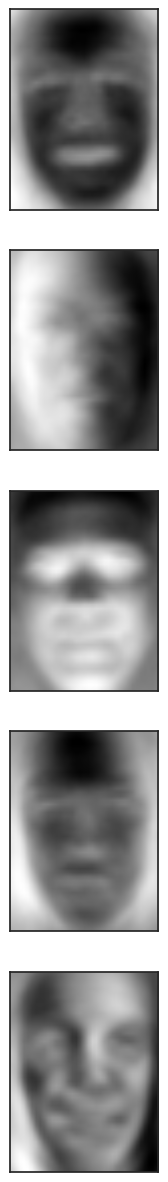

In [62]:
fig = plt.figure(figsize=(15, 15))

for i in range(5):
    ax = fig.add_subplot(5, 1, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(50,37), cmap='gray')

<font color='red'>Вопрос 5. </font> Какая из первых 30 главных компонент сильнее всего "отвечает" за освещенность лица слева? Конкретней: для какой главной компоненты линейная комбинация исходных признаков (интенсивностей пикселов), если ее представить как изображение, выглядит, как фотография, ярко освещенная слева.

- 1
- 2
- 4
- 5

# 2

Теперь давайте построим проекцию лиц в пространство главных компонент с числом компонент равным 2.

<font color='red'>Вопрос 6. </font> Кто меньше всего похож на других людей в выборке, если выделять 2 главные компоненты? Для ответа на этот вопрос выделите 2 главные компоненты в масштабированных данных (используйте опять  параметр `svd_solver='randomized'` и `random_state=1`), посчитайте для каждого человека в выборке среднее значение 2 главных компонент всех его фотографий, затем из 12 2-мерных точек найдите наиболее удаленную от остальных (по среднему евклидову расстоянию до других точек). Можно это делать точно, а можно и на глаз с помощью `sklearn.metrics.euclidean_distances` и `seaborn.heatmap`.

- Колин Пауэлл
- Джордж Буш
- Жак Ширак
- Серена Уильямс

In [73]:
set(lfw_people.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [63]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2,svd_solver='randomized',random_state=1)
X_centered = X_scaled.copy()
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [64]:
X_pca.shape

(1560, 2)

In [93]:
def mn(j):
    n = 0
    value1 = 0
    value2 = 0
    for i  in range(1560):
        if(lfw_people.target[i] == j):
            value1 = value1+X_pca[i,0]
            value2 = value2+X_pca[i,1]
            n = n+1
            
    return np.array([value1/n,value2/n])

In [96]:
z = []
for j in range(12):
    z.append(mn(j))

In [99]:
import sklearn

In [105]:
sklearn.metrics.euclidean_distances(np.array([0,0]),np.array([3,4]))

/home/dz/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dz/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 5.]])

In [111]:
m = []
for i in range(12):
    for j in range(12):
        d = sklearn.metrics.euclidean_distances(z[i],z[j])
        m.append(d)
        print(i,j,d)

0 0 [[ 0.]]
0 1 [[ 2.60795544]]
0 2 [[ 4.58570336]]
0 3 [[ 7.34396577]]
0 4 [[ 8.33572044]]
0 5 [[ 7.0768835]]
0 6 [[ 11.79893304]]
0 7 [[ 14.63553028]]
0 8 [[ 3.4122738]]
0 9 [[ 9.02365199]]
0 10 [[ 47.26386794]]
0 11 [[ 9.10142052]]
1 0 [[ 2.60795544]]
1 1 [[ 0.]]
1 2 [[ 6.90871636]]
1 3 [[ 9.71075918]]
1 4 [[ 10.85657259]]
1 5 [[ 4.74490876]]
1 6 [[ 14.40360588]]
1 7 [[ 16.74152898]]
1 8 [[ 6.00666739]]
1 9 [[ 11.62897087]]
1 10 [[ 44.91254148]]
1 11 [[ 11.48714547]]
2 0 [[ 4.58570336]]
2 1 [[ 6.90871636]]
2 2 [[ 0.]]
2 3 [[ 2.80223891]]
2 4 [[ 4.15775821]]
2 5 [[ 11.59849438]]
2 6 [[ 8.18669812]]
2 7 [[ 10.07899002]]
2 8 [[ 2.12793229]]
2 9 [[ 5.59873009]]
2 10 [[ 51.80082216]]
2 11 [[ 4.57926772]]
3 0 [[ 7.34396577]]
3 1 [[ 9.71075918]]
3 2 [[ 2.80223891]]
3 3 [[ 0.]]
3 4 [[ 1.89152477]]
3 5 [[ 14.39063509]]
3 6 [[ 6.07494365]]
3 7 [[ 7.52288041]]
3 8 [[ 4.33617742]]
3 9 [[ 4.01499098]]
3 10 [[ 54.59331476]]
3 11 [[ 1.77743852]]
4 0 [[ 8.33572044]]
4 1 [[ 10.85657259]]
4 2 [[ 4.15

/home/dz/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dz/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dz/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Dep

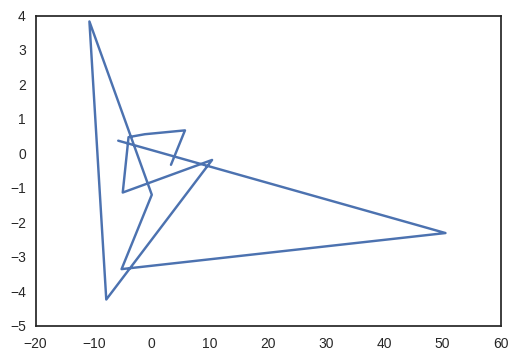

In [119]:
plt.plot(np.array(z)[:,0],np.array(z)[:,1])

In [185]:
z

[array([ 3.29070113, -0.31189239]),
 array([ 5.6995085 ,  0.68764682]),
 array([-1.20829945,  0.57561484]),
 array([-4.00925697,  0.49088083]),
 array([-5.00607975, -1.11666708]),
 array([ 10.36617197,  -0.17049725]),
 array([-7.84110171, -4.22313086]),
 array([-10.74070016,   3.84966071]),
 array([-0.00877104, -1.18200497]),
 array([-5.20952256, -3.3405047 ]),
 array([ 50.51302437,  -2.29315467]),
 array([-5.78373841,  0.38839512])]

In [120]:
z

[array([ 3.29070113, -0.31189239]),
 array([ 5.6995085 ,  0.68764682]),
 array([-1.20829945,  0.57561484]),
 array([-4.00925697,  0.49088083]),
 array([-5.00607975, -1.11666708]),
 array([ 10.36617197,  -0.17049725]),
 array([-7.84110171, -4.22313086]),
 array([-10.74070016,   3.84966071]),
 array([-0.00877104, -1.18200497]),
 array([-5.20952256, -3.3405047 ]),
 array([ 50.51302437,  -2.29315467]),
 array([-5.78373841,  0.38839512])]

# SERENA

## 2. t-SNE

Возьмём упомянутый в статье способ визуализации данных с помощью [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) и посмотрим на наши лица на плоскости. При использовании `n_components=2` и `random_state=1` в левом верхнем углу проекции образуется кластер из лиц, относящихся к одному человеку. 

<font color='red'>Вопрос 7. </font> Какому человеку из набора данных lfw_people соответствуют два выброса в правом верхнем углу проекции t-SNE с параметрами `n_components=2` и `random_state=1`?

- Серена Уильямс
- Уго Чавес
- Джордж Буш
- Жак Ширак

In [139]:
import numpy as np
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=1)
np.set_printoptions(suppress=True)
tsn = model.fit_transform(X_scaled) 
tsn

array([[  8.4868451 ,  -8.02781643],
       [ -9.48974018,  11.51393122],
       [ -1.16626681,  -2.50821643],
       ..., 
       [ -6.502465  ,  -0.74148236],
       [-13.99171521, -10.21688128],
       [-11.88120963,  -0.41387348]])

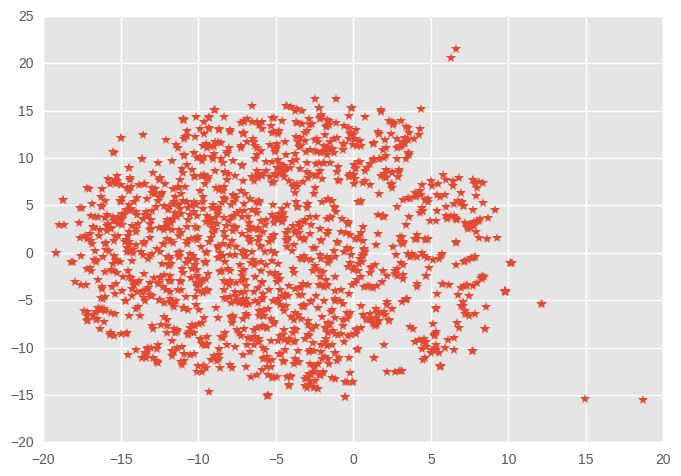

In [140]:
plt.plot(tsn[:,0],tsn[:,1],"*")
plt.show()

In [203]:
np.argmax(tsn[:,1]),np.max(tsn[:,1]),lfw_people.target[1023]

(1023, 21.496987861624376, 4)

In [180]:
np.argmax(tsn[:1023,1])

917

In [174]:
np.max(tsn[:,1])

21.496987861624376

In [169]:
lfw_people.target[1023]

4

In [181]:
lfw_people.target[917]

4

In [167]:
set(lfw_people.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [164]:
lfw_people.target_names


array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], 
      dtype='<U17')

## 3. Кластеризация

Для следующего вопроса загрузим набор данных с ценами на жильё:

In [182]:
boston = datasets.load_boston()
X = boston.data

Найдем с помощью метода локтя (см. 7 [статью](https://habrahabr.ru/company/ods/blog/325654/) курса) оптимальное число кластеров, которое стоит задать алгоритму kMeans в качестве гиперпараметра. 

<font color='red'>Вопрос 8. </font> Каким будет оптимальное число кластеров для датасета с ценами на жильё, если оценивать его с помощью метода локтя? Используйте в kMeans `random_state=1`, данные не масштабируйте.

- 2
- 3
- 4
- 5

В данном случае мы ищем наиболее выделеный излом в кривой расстояний до цетроидов в зависимости от числа кластеров. Будем рассматривать возможное число кластеров от 2 до 10. Как и в предыдущей задаче, нужно будет использовать `random_state=1` для инициализации алгоритма k-means.

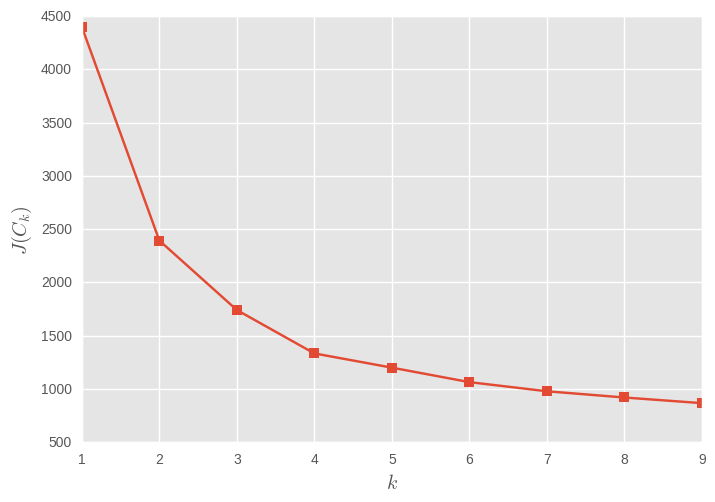

In [183]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

# 4

Вернемся к набору данных с лицами. Притворимся, что мы не знаем ответов – на какой фотографии кто изображен, но знаем, что это 12 разных людей. Давайте сравним результаты кластеризации фотографий с помощью 4 алгоритмов – KMeans, агломеративной кластеризации, AffinityPropagation и спектральной кластеризации. Параметры алгоритмов возьмите как в примере в конце [статьи](https://habrahabr.ru/company/ods/blog/325654/), только измените число кластеров на 12.

In [188]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = lfw_people
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=12, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=12, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=12))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.018648,0.059461,0.086114,0.075043,0.080198,0.049346
Affinity,0.011917,0.070108,0.276269,0.138634,0.184623,0.020666
Spectral,0.024950,0.072295,0.090600,0.099295,0.094749,-0.052506
Agglomerative,0.016692,0.060287,0.086180,0.076155,0.080858,0.014837


In [189]:
X_scaled.shape

(1560, 1850)

In [190]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = lfw_people
X, y = X_scaled, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=12, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=12, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=12))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.026030,0.063319,0.090607,0.078783,0.084282,0.043721
Affinity,0.014504,0.086787,0.304081,0.154062,0.204510,0.019207
Spectral,0.033514,0.078641,0.096853,0.107486,0.101893,-0.030444
Agglomerative,0.028409,0.069880,0.096837,0.085601,0.090873,0.021879


silhuette Данная величина лежит в диапазоне [−1,1]. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам.

v [0,1], и большие значения соответствуют более точной кластеризации. 

Homogenity	Completeness Обе величины принимают значения в диапазоне [0,1], и большие значения соответствуют более точной кластеризации.

AMI  [0,1]. Значения, близкие к нулю, говорят о независимости разбиений, а близкие к единице – об их схожести

ARI принимает значения в диапазоне [−1,1]. Отрицательные значения соответствуют "независимым" разбиениям на кластеры, значения, близкие к нулю, — случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи

<font color='red'>Вопрос 9. </font> Выберите все верные утверждения:

- Агломеративная кластеризация справилась лучше всех других алгоритмов по всем метрикам качества
- Результаты кластеризации неудовлетворительные, ни одна из метрики не превышает 35%
- Affinity Propagation сработала лучше спектральной кластеризации по всем метрикам качества
- Если выделять только 2 кластера, а результаты кластеризации сравнивать с бинарным вектором, Серена Уильямс это или нет, то в целом алгоритмы справляются лучше, некоторые метрики превышают значение в 66%

# 1-,2+,3-,4+

In [192]:
lfw_people.target_names[10]

'Serena Williams'

In [193]:
sel = []
for i in range(len(lfw_people.target)):
    if(lfw_people.target[i]==10):
        sel.append(1)
    else:
        sel.append(0)

In [198]:
np.mean(sel)

0.033333333333333333

In [200]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = lfw_people
X, y = X_scaled, sel

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.027811,0.042521,0.200508,0.042976,0.070781,0.145562
Affinity,0.001565,0.017368,0.675966,0.023491,0.045404,0.019207
Spectral,0.166712,0.080664,0.277756,0.081264,0.125740,0.143771
Agglomerative,0.146285,0.074895,0.272419,0.075466,0.118191,0.134989


In [201]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = lfw_people
X, y = lfw_people.data, sel

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.026878,0.042168,0.199079,0.042622,0.070212,0.119345
Affinity,0.001505,0.016969,0.672058,0.023132,0.044724,0.020666
Spectral,0.162619,0.076269,0.262280,0.076874,0.118899,0.112593
Agglomerative,0.015702,0.033423,0.159867,0.033877,0.055907,0.091113


Возьмите полученные раннее координаты 12 "средних" изображений людей. Постройте для них дендрограмму. Используйте  `scipy.cluster.hierarchy` и `scipy.spatial.distance.pdist`, параметры возьмите такие же, как в соответствующем примере в [статье](https://habrahabr.ru/company/ods/blog/325654/).

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

''' ВАШ КОД ЗДЕСЬ '''

<font color='red'>Вопрос 10. </font> Какому человеку соответствует точка, объединившаяся с другими при построении дендрограммы **предпоследней**?

- Gerhard Schroeder
- Jean Chretien
- John Ashcroft
- Junichiro Koizumi

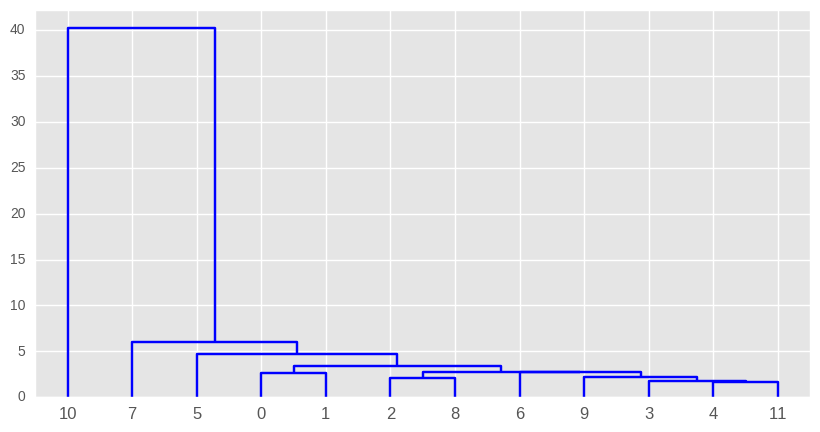

In [186]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = z.copy()



distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# Gerhard Schroeder

In [187]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], 
      dtype='<U17')